In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
covid = pd.read_csv(
    "/content/rekap-data-bulanan-covid-19-bulan-januari-tahun-2021.csv",
    parse_dates=["tanggal"],
).dropna()

covid.head()

,tanggal,id_kel,nama_provinsi,nama_kota,nama_kecamatan,nama_kelurahan,kategori,sub_kategori,jumlah
0,2021-01-02,3172051003,DKI JAKARTA,JAKARTA UTARA,PADEMANGAN,ANCOL,SUSPEK,Perawatan RS,2
1,2021-01-02,3173041007,DKI JAKARTA,JAKARTA BARAT,TAMBORA,ANGKE,SUSPEK,Perawatan RS,2
2,2021-01-02,3175041005,DKI JAKARTA,JAKARTA TIMUR,KRAMAT JATI,BALE KAMBANG,SUSPEK,Perawatan RS,1
3,2021-01-02,3175031003,DKI JAKARTA,JAKARTA TIMUR,JATINEGARA,BALI MESTER,SUSPEK,Perawatan RS,0
4,2021-01-02,3175101006,DKI JAKARTA,JAKARTA TIMUR,CIPAYUNG,BAMBU APUS,SUSPEK,Perawatan RS,0


# **Data Exploration**

In [20]:
covid

,tanggal,id_kel,nama_provinsi,nama_kota,nama_kecamatan,nama_kelurahan,kategori,sub_kategori,jumlah
0,2021-01-02,3172051003,DKI JAKARTA,JAKARTA UTARA,PADEMANGAN,ANCOL,SUSPEK,Perawatan RS,2
1,2021-01-02,3173041007,DKI JAKARTA,JAKARTA BARAT,TAMBORA,ANGKE,SUSPEK,Perawatan RS,2
2,2021-01-02,3175041005,DKI JAKARTA,JAKARTA TIMUR,KRAMAT JATI,BALE KAMBANG,SUSPEK,Perawatan RS,1
3,2021-01-02,3175031003,DKI JAKARTA,JAKARTA TIMUR,JATINEGARA,BALI MESTER,SUSPEK,Perawatan RS,0
4,2021-01-02,3175101006,DKI JAKARTA,JAKARTA TIMUR,CIPAYUNG,BAMBU APUS,SUSPEK,Perawatan RS,0
...,...,...,...,...,...,...,...,...,...
26428,2021-01-30,3175011006,DKI JAKARTA,JAKARTA TIMUR,MATRAMAN,UTAN KAYU SELATAN,POSITIF,Self Isolation,84
26429,2021-01-30,3175011002,DKI JAKARTA,JAKARTA TIMUR,MATRAMAN,UTAN KAYU UTARA,POSITIF,Self Isolation,60
26430,2021-01-30,3171031008,DKI JAKARTA,JAKARTA PUSAT,KEMAYORAN,UTAN PANJANG,POSITIF,Self Isolation,96
26431,2021-01-30,3172021007,DKI JAKARTA,JAKARTA UTARA,TANJUNG PRIOK,WARAKAS,POSITIF,Self Isolation,127


In [21]:
covid.dtypes

tanggal           datetime64[ns]
id_kel                     int64
nama_provinsi             object
nama_kota                 object
nama_kecamatan            object
nama_kelurahan            object
kategori                  object
sub_kategori              object
jumlah                     int64
dtype: object

In [41]:
list_kategori = covid['kategori'].unique()
list_kategori.tolist()

['SUSPEK',
 'PROBABLE',
 'PELAKU PERJALANAN',
 'KONTAK ERAT',
 'DISCARDED',
 'POSITIF']

In [42]:
list_kecamatan = covid['nama_kecamatan'].unique()
list_kecamatan.tolist()

['PADEMANGAN',
 'TAMBORA',
 'KRAMAT JATI',
 'JATINEGARA',
 'CIPAYUNG',
 'MAMPANG PRAPATAN',
 'PASAR REBO',
 'TANAH ABANG',
 'PESANGGRAHAN',
 'TEBET',
 'SENEN',
 'CAKUNG',
 'KEMAYORAN',
 'CEMPAKA PUTIH',
 'CENGKARENG',
 'CIRACAS',
 'GAMBIR',
 'JAGAKARSA',
 'MENTENG',
 'PANCORAN',
 'CILANDAK',
 'PASAR MINGGU',
 'CILINCING',
 'KEBAYORAN BARU',
 'PULO GADUNG',
 'MAKASAR',
 'KEBAYORAN LAMA',
 'DUREN SAWIT',
 'KEBON JERUK',
 'JOHAR BARU',
 'TAMAN SARI',
 'GROGOL PETAMBURAN',
 'SETIA BUDI',
 'SAWAH BESAR',
 'PALMERAH',
 'KEMBANGAN',
 'KALI DERES',
 'PENJARINGAN',
 'MATRAMAN',
 'TANJUNG PRIOK',
 'KELAPA GADING',
 'KOJA',
 'KEP. SERIBU UTARA',
 'KEP. SERIBU SELATAN']

# 1. Persebaran tiap kategori tiap kecamatan

In [32]:
data_kecamatan = covid.drop(columns=['id_kel', 'nama_provinsi', 'nama_kota', 'nama_kelurahan', 'sub_kategori'])
data_kecamatan

,tanggal,nama_kecamatan,kategori,jumlah
0,2021-01-02,PADEMANGAN,SUSPEK,2
1,2021-01-02,TAMBORA,SUSPEK,2
2,2021-01-02,KRAMAT JATI,SUSPEK,1
3,2021-01-02,JATINEGARA,SUSPEK,0
4,2021-01-02,CIPAYUNG,SUSPEK,0
...,...,...,...,...
26428,2021-01-30,MATRAMAN,POSITIF,84
26429,2021-01-30,MATRAMAN,POSITIF,60
26430,2021-01-30,KEMAYORAN,POSITIF,96
26431,2021-01-30,TANJUNG PRIOK,POSITIF,127


In [45]:
categorized_data = data_kecamatan.groupby(['nama_kecamatan', 'kategori']).sum()
categorized_data

jumlah
nama_kecamatan kategori                 
CAKUNG         DISCARDED            2319
               KONTAK ERAT         78004
               PELAKU PERJALANAN     204
               POSITIF             30563
               PROBABLE              119
...                                  ...
TEBET          KONTAK ERAT         41088
               PELAKU PERJALANAN     387
               POSITIF             19377
               PROBABLE               85
               SUSPEK              36914

[264 rows x 1 columns]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe81560ef10>,
      dtype=object)

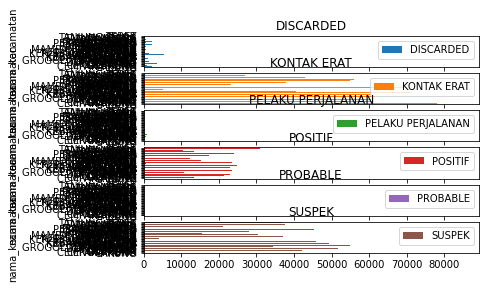

In [51]:
pd.pivot_table(categorized_data.reset_index(),
               index = 'nama_kecamatan', columns = 'kategori', values = 'jumlah'
               ).plot.barh(subplots=True)

# 2.Rata-rata covid tiap kelurahan perhari

In [23]:
covid_kelurahan = covid.loc[:, ["tanggal", "nama_kelurahan", "kategori", "jumlah"]]
covid_kelurahan

,tanggal,nama_kelurahan,kategori,jumlah
0,2021-01-02,ANCOL,SUSPEK,2
1,2021-01-02,ANGKE,SUSPEK,2
2,2021-01-02,BALE KAMBANG,SUSPEK,1
3,2021-01-02,BALI MESTER,SUSPEK,0
4,2021-01-02,BAMBU APUS,SUSPEK,0
...,...,...,...,...
26428,2021-01-30,UTAN KAYU SELATAN,POSITIF,84
26429,2021-01-30,UTAN KAYU UTARA,POSITIF,60
26430,2021-01-30,UTAN PANJANG,POSITIF,96
26431,2021-01-30,WARAKAS,POSITIF,127


In [24]:
covid_kelurahan['kategori'] = covid_kelurahan['kategori'].astype('str')
covid_kelurahan.dtypes

tanggal           datetime64[ns]
nama_kelurahan            object
kategori                  object
jumlah                     int64
dtype: object

In [25]:
data_kelurahan = covid_kelurahan[covid_kelurahan['kategori'] == 'POSITIF']
data_kelurahan

,tanggal,nama_kelurahan,kategori,jumlah
21360,2021-01-02,ANCOL,POSITIF,2
21361,2021-01-02,ANGKE,POSITIF,12
21362,2021-01-02,BALE KAMBANG,POSITIF,10
21363,2021-01-02,BALI MESTER,POSITIF,8
21364,2021-01-02,BAMBU APUS,POSITIF,9
...,...,...,...,...
26428,2021-01-30,UTAN KAYU SELATAN,POSITIF,84
26429,2021-01-30,UTAN KAYU UTARA,POSITIF,60
26430,2021-01-30,UTAN PANJANG,POSITIF,96
26431,2021-01-30,WARAKAS,POSITIF,127


In [26]:
perhari = data_kelurahan.groupby(['tanggal', 'nama_kelurahan']).mean()
perhari.round()

jumlah
tanggal    nama_kelurahan           
2021-01-02 ANCOL               145.0
           ANGKE                94.0
           BALE KAMBANG        118.0
           BALI MESTER          80.0
           BAMBU APUS          119.0
...                              ...
2021-01-30 UTAN KAYU SELATAN   242.0
           UTAN KAYU UTARA     178.0
           UTAN PANJANG        160.0
           WARAKAS             228.0
           WIJAYA KUSUMA       181.0

[1334 rows x 1 columns]

# 3. Titik tertinggi perbulan tiap kota

In [27]:
covid_kota = covid.loc[:, ["tanggal", "nama_kota", "kategori", "jumlah"]]
covid_kota['kategori'] = covid_kota['kategori'].astype('str')
covid_kota

,tanggal,nama_kota,kategori,jumlah
0,2021-01-02,JAKARTA UTARA,SUSPEK,2
1,2021-01-02,JAKARTA BARAT,SUSPEK,2
2,2021-01-02,JAKARTA TIMUR,SUSPEK,1
3,2021-01-02,JAKARTA TIMUR,SUSPEK,0
4,2021-01-02,JAKARTA TIMUR,SUSPEK,0
...,...,...,...,...
26428,2021-01-30,JAKARTA TIMUR,POSITIF,84
26429,2021-01-30,JAKARTA TIMUR,POSITIF,60
26430,2021-01-30,JAKARTA PUSAT,POSITIF,96
26431,2021-01-30,JAKARTA UTARA,POSITIF,127


In [28]:
data_kota = covid_kota[covid_kelurahan['kategori'] == 'POSITIF']
data_kota

,tanggal,nama_kota,kategori,jumlah
21360,2021-01-02,JAKARTA UTARA,POSITIF,2
21361,2021-01-02,JAKARTA BARAT,POSITIF,12
21362,2021-01-02,JAKARTA TIMUR,POSITIF,10
21363,2021-01-02,JAKARTA TIMUR,POSITIF,8
21364,2021-01-02,JAKARTA TIMUR,POSITIF,9
...,...,...,...,...
26428,2021-01-30,JAKARTA TIMUR,POSITIF,84
26429,2021-01-30,JAKARTA TIMUR,POSITIF,60
26430,2021-01-30,JAKARTA PUSAT,POSITIF,96
26431,2021-01-30,JAKARTA UTARA,POSITIF,127


In [29]:
max_perkota = data_kota.groupby(['nama_kota']).max()
max_perkota

,tanggal,kategori,jumlah
nama_kota,,,
JAKARTA BARAT,2021-01-30,POSITIF,1735
JAKARTA PUSAT,2021-01-30,POSITIF,1202
JAKARTA SELATAN,2021-01-30,POSITIF,1481
JAKARTA TIMUR,2021-01-30,POSITIF,1589
JAKARTA UTARA,2021-01-30,POSITIF,1564
KAB.ADM.KEP.SERIBU,2021-01-30,POSITIF,94


In [30]:
max_kategori = covid_kota.groupby(['nama_kota', 'kategori']).max()
max_kategori

tanggal  jumlah
nama_kota          kategori                            
JAKARTA BARAT      DISCARDED         2021-01-30      94
                   KONTAK ERAT       2021-01-30    4193
                   PELAKU PERJALANAN 2021-01-30      49
                   POSITIF           2021-01-30    1735
                   PROBABLE          2021-01-30      23
                   SUSPEK            2021-01-30    3962
JAKARTA PUSAT      DISCARDED         2021-01-30     123
                   KONTAK ERAT       2021-01-30    3604
                   PELAKU PERJALANAN 2021-01-30      47
                   POSITIF           2021-01-30    1202
                   PROBABLE          2021-01-30      14
                   SUSPEK            2021-01-30    2840
JAKARTA SELATAN    DISCARDED         2021-01-30     113
                   KONTAK ERAT       2021-01-30    4339
                   PELAKU PERJALANAN 2021-01-30     102
                   POSITIF           2021-01-30    1481
                   PROBABLE          2021-01-30      17
                   SUSPEK            2021-01-30    4065
JAKARTA TIMUR      DISCARDED         2021-01-30     163
                   KONTAK ERAT       2021-01-30    4037
                   PELAKU PERJALANAN 2021-01-30      43
                   POSITIF           2021-01-30    1589
                   PROBABLE          2021-01-30      29
                   SUSPEK            2021-01-30    3431
JAKARTA UTARA      DISCARDED         2021-01-30     503
                   KONTAK ERAT       2021-01-30    4467
                   PELAKU PERJALANAN 2021-01-30      59
                   POSITIF           2021-01-30    1564
                   PROBABLE          2021-01-30       9
                   SUSPEK            2021-01-30    5576
KAB.ADM.KEP.SERIBU DISCARDED         2021-01-30       4
                   KONTAK ERAT       2021-01-30     628
                   PELAKU PERJALANAN 2021-01-30       3
                   POSITIF           2021-01-30      94
                   PROBABLE          2021-01-30       1
                   SUSPEK            2021-01-30     843

# 4. Perbandingan Suspek Meninggal dan Selesai Isolasi

In [4]:
perbandingan = covid.loc[covid["sub_kategori"].isin(['Suspek Meninggal' , 'Selesai Isolasi'])]
perbandingan

,tanggal,id_kel,nama_provinsi,nama_kota,nama_kecamatan,nama_kelurahan,kategori,sub_kategori,jumlah
2670,2021-01-02,3172051003,DKI JAKARTA,JAKARTA UTARA,PADEMANGAN,ANCOL,SUSPEK,Suspek Meninggal,0
2671,2021-01-02,3173041007,DKI JAKARTA,JAKARTA BARAT,TAMBORA,ANGKE,SUSPEK,Suspek Meninggal,2
2672,2021-01-02,3175041005,DKI JAKARTA,JAKARTA TIMUR,KRAMAT JATI,BALE KAMBANG,SUSPEK,Suspek Meninggal,1
2673,2021-01-02,3175031003,DKI JAKARTA,JAKARTA TIMUR,JATINEGARA,BALI MESTER,SUSPEK,Suspek Meninggal,1
2674,2021-01-02,3175101006,DKI JAKARTA,JAKARTA TIMUR,CIPAYUNG,BAMBU APUS,SUSPEK,Suspek Meninggal,1
...,...,...,...,...,...,...,...,...,...
21355,2021-01-30,3175011006,DKI JAKARTA,JAKARTA TIMUR,MATRAMAN,UTAN KAYU SELATAN,DISCARDED,Selesai Isolasi,163
21356,2021-01-30,3175011002,DKI JAKARTA,JAKARTA TIMUR,MATRAMAN,UTAN KAYU UTARA,DISCARDED,Selesai Isolasi,54
21357,2021-01-30,3171031008,DKI JAKARTA,JAKARTA PUSAT,KEMAYORAN,UTAN PANJANG,DISCARDED,Selesai Isolasi,39
21358,2021-01-30,3172021007,DKI JAKARTA,JAKARTA UTARA,TANJUNG PRIOK,WARAKAS,DISCARDED,Selesai Isolasi,88


In [15]:
data_perbandingan = perbandingan.loc[:,['tanggal','sub_kategori','jumlah']]
data_perbandingan['sub_kategori'] = data_perbandingan['sub_kategori'].astype('str')
data_perbandingan.dtypes

tanggal         datetime64[ns]
sub_kategori            object
jumlah                   int64
dtype: object

In [19]:
compare_data = data_perbandingan.groupby(['tanggal','sub_kategori']).sum()
compare_data

jumlah
tanggal    sub_kategori            
2021-01-02 Selesai Isolasi   600852
           Suspek Meninggal     511
2021-01-09 Selesai Isolasi   627467
           Suspek Meninggal     513
2021-01-16 Selesai Isolasi   780675
           Suspek Meninggal     513
2021-01-23 Selesai Isolasi   795820
           Suspek Meninggal     513
2021-01-30 Selesai Isolasi   861511
           Suspek Meninggal     513